In [21]:
import json
import itertools
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.stats.mstats import spearmanr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from importlib import reload

In [13]:
MAX_SAMPLES = 5000

df = pd.read_csv('./datasets_with_labels/mnist.csv', header=None, nrows=MAX_SAMPLES)
df_data = df.iloc[:, :-1]
df_labels = df.iloc[:, -1]

In [16]:
tsne_embedding = TSNE(n_components=2).fit_transform(df_data.values)
df_tsne_embedding = pd.DataFrame(data=tsne_embedding)

random_embedding = np.random.rand(len(df), 2)
df_random_embedding = pd.DataFrame(data=random_embedding)

#### Calculate Metrics based on co-rank matrix

In [5]:
import metrics.co_rank_matrix_based_metric 
reload(metrics.co_rank_matrix_based_metric)

from metrics.co_rank_matrix_based_metric import CoRankMatrixBasedMetric

In [17]:
tsne_embedding_metric = CoRankMatrixBasedMetric(
    df_data,
    df_tsne_embedding,
    df_labels
)

random_embedding_metric = CoRankMatrixBasedMetric(
    df_data,
    df_random_embedding,
    df_labels
)

In [18]:
tsne_embedding_metric_value = json.loads(tsne_embedding_metric.calculate())

c:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:117: RuntimeWarning: invalid value encountered in long_scalars
  return numerator / denominator
c:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


CoRankMatrixBasedMetric calculation took 72.65 seconds.


In [19]:
random_embedding_metric_value = json.loads(random_embedding_metric.calculate())

c:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:117: RuntimeWarning: invalid value encountered in long_scalars
  return numerator / denominator
c:\Users\msmen\Desktop\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


CoRankMatrixBasedMetric calculation took 74.51 seconds.


Text(0.5, 0.98, '[MNIST t-SNE embedding] \nVisualization of the metric results based on co-rank matrix')

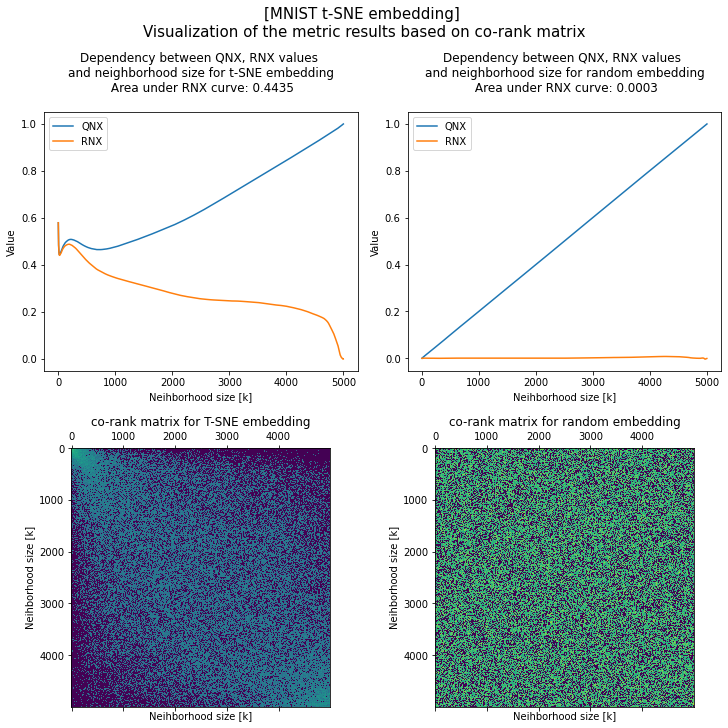

In [35]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for t-SNE embedding'
               f'\n Area under RNX curve: {tsne_embedding_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(tsne_embedding_metric_value['QNX'], label='QNX')
ax00.plot(tsne_embedding_metric_value['RNX'], label='RNX')
# ax00.fill_between(np.arange(0, len(z3['RNX'])), z3['RNX'], color='orange', alpha=0.15)
ax00.legend()

ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for random embedding'
               f'\n Area under RNX curve: {random_embedding_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(random_embedding_metric_value['QNX'], label='QNX')
ax01.plot(random_embedding_metric_value['RNX'], label='RNX')
# ax00.fill_between(np.arange(0, len(z3['RNX'])), z3['RNX'], color='orange', alpha=0.15)
ax01.legend()


ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for T-SNE embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(tsne_embedding_metric._co_rank_matrix+1e-2))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for random embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(random_embedding_metric._co_rank_matrix+1e-2))

fig.suptitle('[MNIST t-SNE embedding] \nVisualization of the metric results based on co-rank matrix', size=15)